In [11]:
import tensorflow as tf
from tensorflow import keras
from src.model import StackedHourglassNetwork
import numpy as np

In [12]:
from src.loss import MSE
from src.metric.PCK import PCK as pck
from src.model.StackedHourglassNetwork import StackedHourglassNet
model = tf.keras.models.load_model('./8stcks_300epch/', compile=False)
# model = StackedHourglassNet(16)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.mean_squared_error,
    metrics=[pck, 'acc'],
    )
# checkpoint_path = "../training_1/cp-0001.ckpt.index"
# model.load_weights(checkpoint_path)
#print(model.summary())

tf.Tensor(246.01256, shape=(), dtype=float32)
tf.Tensor(12.07275, shape=(), dtype=float32)


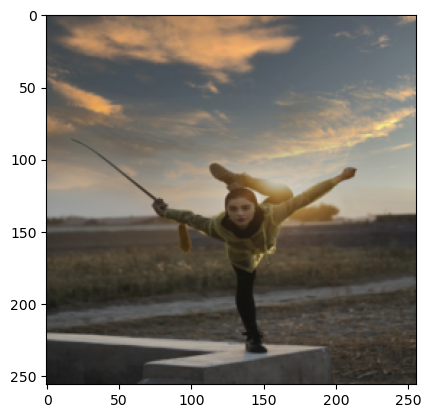

In [13]:
import matplotlib.pyplot as plt
test_image = tf.io.read_file('./practice/test_2.jpg')
test_image = tf.io.decode_image(test_image)

target_height = 256
target_width = 256

resized_image = tf.image.resize(test_image, (target_height, target_width), antialias=True)

from src.dataset.MPII import preprocess
# rotated_image = preprocess.rotate30()(resized_image)
print(tf.reduce_max(resized_image))
print(tf.reduce_min(resized_image))
plt.imshow((resized_image / 255) )
# plt.imshow(tf.cast(resized_image, dtype=tf.int8))

1/1 [==============================] - 13s 13s/step
(64, 64, 1)
(64, 64, 1)
(64, 64, 1)
(64, 64, 1)
(64, 64, 1)
(64, 64, 1)
(64, 64, 1)
(64, 64, 1)


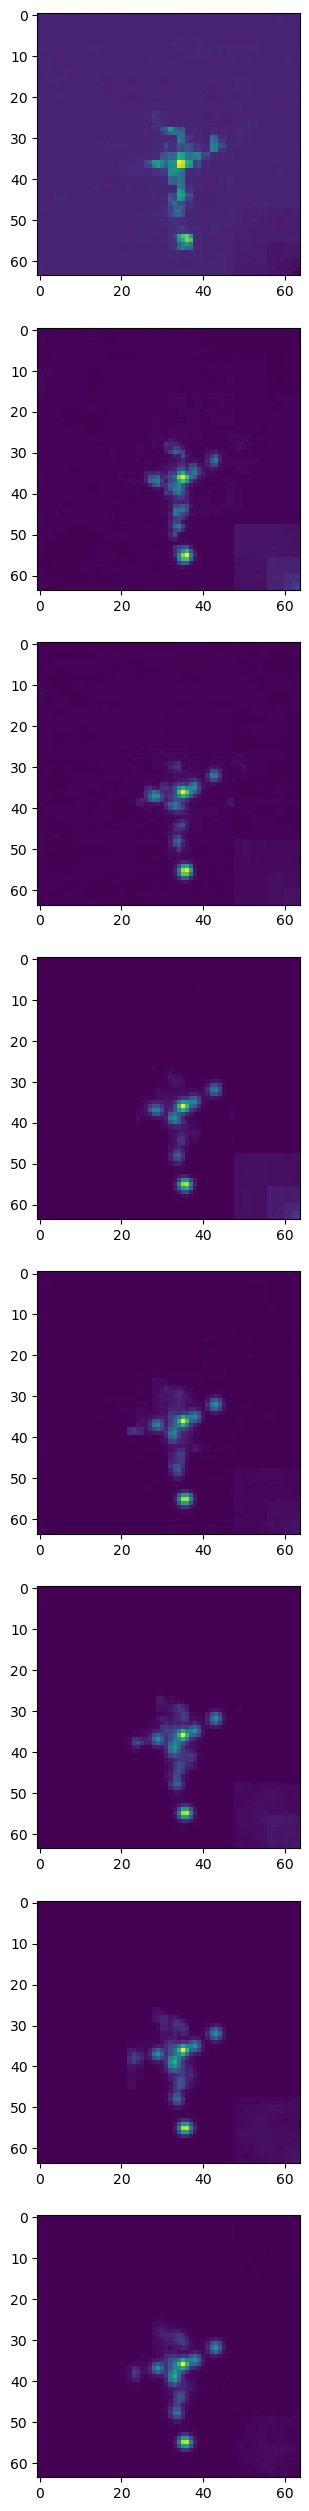

In [14]:
result = model.predict(tf.expand_dims(resized_image, axis=0))
# print(result.shape)
# print(result.max())
# print(result.min())

fig, axs = plt.subplots(8, 1, figsize=(16, 32))

for idx, res in enumerate(result):
    res_sum = tf.reduce_sum(tf.squeeze(res, axis=0), axis=-1, keepdims=True)
    print(res_sum.shape)
    axs[idx].imshow(res_sum)

(1, 64, 64, 16)
(64, 64, 16)


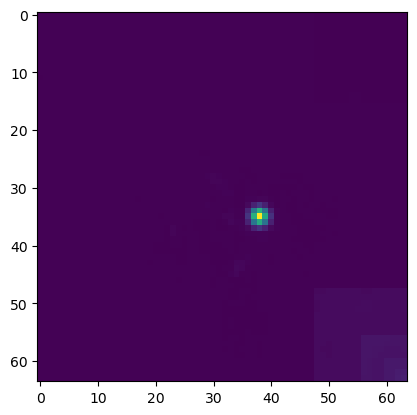

In [17]:
print(result[-1].shape)

result_squeezed = tf.squeeze(result[-1], axis=0)
print(result_squeezed.shape)
#result_img = tf.reduce_sum(result_squeezed, axis=-1, keepdims=True)
# result_img = tf.cast(result_img, dtype=tf.uint8)
plt.imshow(result_squeezed[:,:,13])

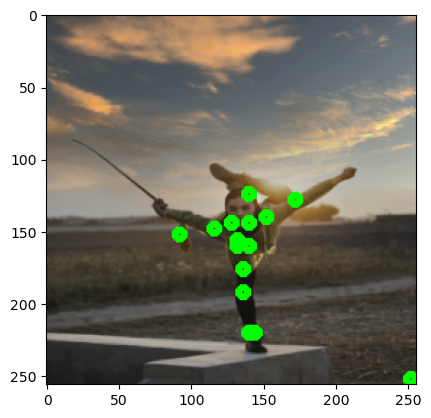

In [16]:
import cv2
vis_image = tf.cast(resized_image, dtype=tf.uint8).numpy()
for idx in range(result_squeezed.shape[-1]):
    one_prad = result_squeezed[:,:,idx]
    max_val = tf.reduce_max(one_prad, keepdims=True)
    cond = tf.equal(one_prad, max_val)
    res = tf.where(cond)[0]
    res = res.numpy()
    y, x = res[0], res[1]
    vis_image = cv2.circle(vis_image, (x * 4, y * 4), 3,(0,255,0), cv2.LINE_4) 
    #print(result_squeezed[:,:,1].numpy().max())
    #vis_image = cv2.circle(vis_image, (point[0], point[1]),3, 'red')

plt.imshow(vis_image)